### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Unsupervised Learning. We will be using the facebook live sellers dataset for Task 1 & 2 of the assignment and here is a brief context about the same - The data is about live selling feature on the Facebook platform. Each record consists of information about the time live information of sale is posted to Facebook and engagements in the data. The engagements are regular Facebook interactions such as share and emotion rection.

As part of the assignment, you will have to accomplish the below tasks.


**Author:** Chintoo Kumar

###**Dataset**

Dataset Link: https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

**About the dataset:**

The Facebook Live Sellers in Thailand is a dataset curated in UCI Machine Learning Datasets. It data contains 7050 observations and twelve attributes. In this assignment, the preprocessed dataset contains 7050 instances and 10 attributes. The details of the attributes are as follows:

* status_type: The type of shared status
* num_reactions: Number of glimpses over a shared status by viewers
* num_comments: Number of comments on that particular shared status
* num_shares: Toal number of shares by peers
* num_likes: Number of likes on the post
* num_loves: Number of love emojis of that shared post
* num_wows: Number of wow emojis on that post
* num_hahas: Number of haha emojis on that post
* num_sads: Number of sad emojis on that post
* num_angrys: Number of angry emojis on that post

### **Task 1: Data loading and Data Analysis**

* Load the data file into a dataframe object : df
* Display the first 5 observation of the dataset
* Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.
* Perform EDA viz. Is there any missing values in each column of the provided dataset
* Display all the unique status_type of the dataframe
* Convert categorical variable, i.e., status_type into numerical representation using a label encoder

In [ ]:
##Load the data file into a dataframe object : df

import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv")
df = df.drop(['status_id','status_published','Column1','Column2','Column3','Column4'],axis=1)

In [ ]:
##Display the first 5 observation of the dataset

df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [ ]:
##Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [ ]:
##Perform EDA viz. Is there any missing values in each column of the provided dataset

df.isnull().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [ ]:
##Display all the unique status_type of the dataframe

df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [ ]:
##Convert categorical variable, i.e., status_type into numerical representation using a label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['status_type']=le.fit_transform(df['status_type'])
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


###**Task 2: Feature Scaling**


*   Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique
*   Use Elbow method to determine the number of cluster to be formed
*   Verify optimal number of clusers on the basis of silhouette scores
*   Assigning cluster label to each instance of the dataframe
*   Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score


In [ ]:
##Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique

from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit(df)
scaled_data=scale.transform(df)
scaled_data

array([[1.00000000e+00, 1.12314225e-01, 2.43925679e-02, ...,
        6.36942675e-03, 1.96078431e-02, 0.00000000e+00],
       [3.33333333e-01, 3.18471338e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.81953291e-02, 1.12434493e-02, ...,
        6.36942675e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.33333333e-01, 4.24628450e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 7.45222930e-02, 5.71700810e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 3.60934183e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

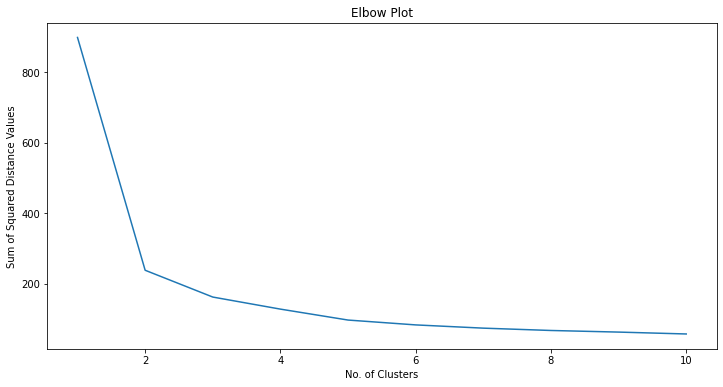

In [ ]:
##Use Elbow method to determine the number of cluster to be formed

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
K=range(1,11)
wcss=[]
for k in K:
  km=KMeans(n_clusters=k)
  km=km.fit(scaled_data)
  wcss.append(km.inertia_)
plt.figure(figsize=(12,6))
plt.plot(K,wcss)
plt.title('Elbow Plot')
plt.xlabel('No. of Clusters')
plt.ylabel('Sum of Squared Distance Values')
plt.show()

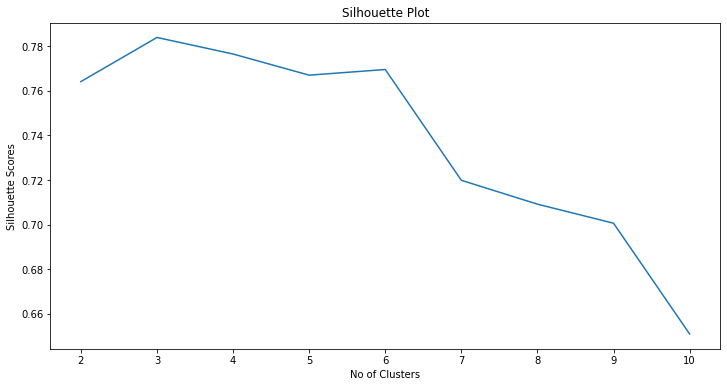

In [ ]:
##Verify optimal number of clusers on the basis of silhouette scores

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt 
K=range(2,11)
sil_score=[]
for k in K:
  km=KMeans(n_clusters=k)
  km=km.fit(scaled_data)
  labels=km.labels_
  sil_score.append(silhouette_score(scaled_data,labels,metric='euclidean'))
plt.figure(figsize=(12,6))
plt.plot(K,sil_score)
plt.title('Silhouette Plot')
plt.xlabel('No of Clusters')
plt.ylabel('Silhouette Scores')
plt.show()

In [ ]:
##Assigning cluster label to each instance of the dataframe

clusters=KMeans(n_clusters=3)
clusters.fit(scaled_data)
df['labels']=clusters.labels_
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,labels
0,3,529,512,262,432,92,3,1,1,0,1
1,1,150,0,0,150,0,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0,1
3,1,111,0,0,111,0,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0,0


In [ ]:
##Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score

from sklearn.metrics.cluster import rand_score
k=round(rand_score(labels,df.status_type),1)
print(k)

0.8


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
round(adjusted_rand_score(labels,df.status_type),1)

0.7

###**Task 3: Perform PCA on Fruit Dataset**

Fruit Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv

* Use PCA to find the first two principal components of the fruit dataset
* Scale the value. Each feature should be centered (zero mean) and with unit variance
* Analysis - perform PCA with 4 components and print their explained variance_ratio



In [ ]:
##Use PCA to find the first two principal components of the fruit dataset

fruit_df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv")
fruit_df.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


In [ ]:
##Scale the value. Each feature should be centered (zero mean) and with unit variance
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(fruit_df.drop('fruit_label',axis=1))
scaled_data=scale.transform(fruit_df.drop('fruit_label',axis=1))
scaled_data

array([[ 0.52944179,  1.59869024, -0.29139659, -2.79359541],
       [ 0.30946246,  1.10485399, -0.66192242, -2.26868417],
       [ 0.23613601,  0.36409961, -0.36550175, -2.13745636],
       [-1.41370901, -1.11740915, -2.21813091,  0.48709984],
       [-1.45037224, -1.36432727, -2.29223608,  0.35587203],
       [-1.52369868, -1.6112454 , -2.51455158,  0.09341641],
       [-1.52369868, -1.48778634, -2.51455158,  0.61832765],
       [-1.59702513, -1.6112454 , -2.73686708,  0.61832765],
       [ 0.27279923, -0.00627758,  0.07912925,  2.06183356],
       [ 0.16280957,  0.36409961, -0.51371209,  1.66815013],
       [ 0.0528199 , -0.25319571, -0.29139659,  2.19306137],
       [ 0.16280957, -0.00627758, -0.06908109,  2.06183356],
       [-0.16715944, -0.12973664, -0.43960692,  1.53692232],
       [ 0.01615667,  0.24064055,  0.00502408, -0.82517826],
       [-0.20382266,  0.61101774, -0.29139659, -0.95640607],
       [-0.13049622,  0.7344768 , -0.43960692, -0.95640607],
       [-0.13049622,  0.

In [ ]:
##Analysis - perform PCA with 4 components and print their explained variance_ratio

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(scaled_data)
fruit_pca = pca.transform(scaled_data)
fruit_pca

array([[ 1.57216938e+00, -1.98004398e+00,  2.04868755e+00,
        -3.68503726e-01],
       [ 8.78416884e-01, -1.57937340e+00,  1.89945480e+00,
        -1.66052501e-01],
       [ 5.29773219e-01, -1.73289051e+00,  1.25822742e+00,
         1.54708004e-01],
       [-2.71261023e+00,  4.14673821e-01,  9.23163856e-01,
         1.48685009e-01],
       [-2.89341158e+00,  2.42002917e-01,  9.09228669e-01,
         2.98105588e-01],
       [-3.14907175e+00, -2.27446010e-02,  1.05715050e+00,
         4.63387835e-01],
       [-3.16435024e+00,  4.89798655e-01,  9.26213713e-01,
         3.59968846e-01],
       [-3.39197004e+00,  4.97051575e-01,  1.03783465e+00,
         4.35602685e-01],
       [-1.33784204e-01,  1.92251073e+00, -7.81979725e-01,
         8.02488424e-02],
       [-2.17834906e-01,  1.77601184e+00, -3.15928733e-03,
        -6.34061560e-02],
       [-6.19839921e-01,  2.02528232e+00, -6.72588634e-01,
         1.51600289e-01],
       [-2.76235120e-01,  1.93637892e+00, -6.74851300e-01,
      

In [ ]:
print(pca.explained_variance_ratio_)

[0.57845054 0.25650171 0.14402362 0.02102413]
